# Attribute Information:

1. mpg: continuous 
2. cylinders: multi-valued discrete 
3. displacement: continuous 
4. horsepower: continuous 
5. weight: continuous 
6. acceleration: continuous 
7. model year: multi-valued discrete 
8. origin: multi-valued discrete 
9. car name: string (unique for each instance)

The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.

In [1]:
import numpy as np
import pandas as pd  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# reading the CSV file into pandas dataframe
mpg_df = pd.read_csv("car-mpg.csv")  

In [4]:
# Check top few records to get a feel of the data structure
mpg_df.head(2)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320


In [5]:
# drop the car name and origin columns
mpg_df = mpg_df.drop('car_name', axis=1)

In [6]:
mpg_df = mpg_df.replace('?', np.nan)
mpg_df = mpg_df.dropna()

In [7]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
mpg         392 non-null float64
cyl         392 non-null int64
disp        392 non-null float64
hp          392 non-null object
wt          392 non-null int64
acc         392 non-null float64
yr          392 non-null int64
origin      392 non-null int64
car_type    392 non-null int64
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


In [8]:
mpg_df['hp'] = mpg_df['hp'].astype('float64')

In [9]:
mpg_df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,0.525510
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,0.499987
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,0.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,1.000000


Text(0,0.5,'mpg')

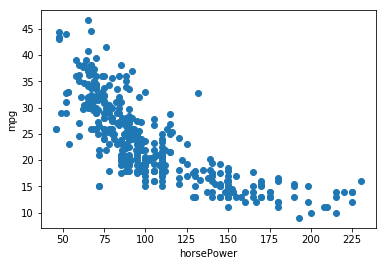

In [10]:
plt.scatter(mpg_df.hp, mpg_df.mpg, )
plt.xlabel('horsePower')
plt.ylabel('mpg')

In [11]:
x = mpg_df[['hp']]
y = mpg_df['mpg']

In [12]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [13]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# Train R^2
print(regression_model.score(x_train, y_train))

0.6042048006827028


In [15]:
# Test R^2
print(regression_model.score(x_test, y_test))

0.6059927446641065


In [16]:
# Train MSE
predictedMpg = regression_model.predict(x_train)
print(mean_squared_error(predictedMpg, y_train))

23.073137254420594


In [17]:
# Test MSE
predictedMpg = regression_model.predict(x_test)
print(mean_squared_error(predictedMpg, y_test))

26.194975304568533


In [18]:
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures( degree = 2, include_bias = False) 
xPoly_train = poly.fit_transform(x_train)
xPoly_train[0:2]

array([[  88., 7744.],
       [  82., 6724.]])

In [19]:
x_train.head(2)

,hp
335,88.0
397,82.0


In [20]:
regression_modelP2 = regression_model.fit(xPoly_train, y_train)

In [21]:
# Train R^2
print(regression_modelP2.score(xPoly_train, y_train))

0.6771788501604865


In [22]:
poly = PolynomialFeatures( degree = 3, include_bias = False) 
xPoly_train = poly.fit_transform(x_train)
regression_modelPnew = regression_model.fit(xPoly_train, y_train)
# Train R^2
print(regression_modelPnew.score(xPoly_train, y_train))

0.6776172907002116


# Features selection

In [23]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [24]:
x = mpg_df.drop('mpg', axis = 1)
y = mpg_df['mpg']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [26]:
print('Training dataset shape:', x_train.shape, y_train.shape)
print('Testing dataset shape:', x_test.shape, y_test.shape)

Training dataset shape: (274, 8) (274,)
Testing dataset shape: (118, 8) (118,)


In [27]:
# Build Lin Reg  to use in feature selection
linR = LinearRegression()

In [28]:
# Build step forward feature selection
sfs1 = sfs(linR, k_features=5, forward=True, scoring='r2', cv=5)

In [29]:
# Perform SFFS
sfs1 = sfs1.fit(x_train.values, y_train.values)

In [30]:
sfs1.get_metric_dict()

{1: {'avg_score': 0.6807942791247162,
  'ci_bound': 0.12351348849845521,
  'cv_scores': array([0.54362205, 0.63041291, 0.67296379, 0.72523906, 0.83173358]),
  'feature_idx': (3,),
  'feature_names': ('3',),
  'std_dev': 0.09609769021095478,
  'std_err': 0.04804884510547739},
 2: {'avg_score': 0.7943587984415492,
  'ci_bound': 0.028616668110338285,
  'cv_scores': array([0.76226899, 0.77835551, 0.81740483, 0.79369266, 0.820072  ]),
  'feature_idx': (3, 5),
  'feature_names': ('3', '5'),
  'std_dev': 0.02226473999211343,
  'std_err': 0.011132369996056712},
 3: {'avg_score': 0.8060381308667253,
  'ci_bound': 0.030394105814325306,
  'cv_scores': array([0.77658548, 0.77907703, 0.82930666, 0.81516195, 0.83005954]),
  'feature_idx': (3, 5, 7),
  'feature_names': ('3', '5', '7'),
  'std_dev': 0.02364764691121605,
  'std_err': 0.011823823455608022},
 4: {'avg_score': 0.8182024052178217,
  'ci_bound': 0.03238380367418996,
  'cv_scores': array([0.79164192, 0.79408855, 0.81163837, 0.83667329, 0.856

In [31]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

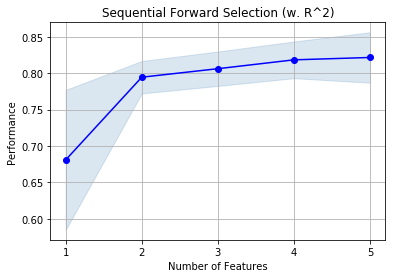

In [32]:
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [33]:
# Which features?
columnList = list(x_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 3, 5, 6, 7]


In [34]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['cyl', 'wt', 'yr', 'origin', 'car_type']


# Build full model with selected features

In [35]:
linR = LinearRegression()
linR.fit(x_train[subsetColumnList], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
y_train_pred = linR.predict(x_train[subsetColumnList])
print('Training accuracy on selected features: %.3f' % linR.score(x_train[subsetColumnList], y_train))

Training accuracy on selected features: 0.830


In [37]:
y_test_pred = linR.predict(x_test[subsetColumnList])
print('Testing accuracy on selected features: %.3f' % linR.score(x_test[subsetColumnList], y_test))

Testing accuracy on selected features: 0.837


# Build full model on ALL features, for comparison

In [38]:
linR = LinearRegression()
linR.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
y_train_pred = linR.predict(x_train)
print('Training accuracy on selected features: %.3f' % linR.score(x_train, y_train))

Training accuracy on selected features: 0.841


In [40]:
y_test_pred = linR.predict(x_test)
print('Testing accuracy on selected features: %.3f' % linR.score(x_test, y_test))

Testing accuracy on selected features: 0.835


# API: SequentialFeatureSelector(estimator, k_features=1, forward=True, floating=False, verbose=0, scoring=None, cv=5, n_jobs=1, pre_dispatch='2n_jobs', clone_estimator=True)

Sequential Feature Selection for Classification and Regression

### Parameters

1. estimator : scikit-learn classifier or regressor

2. k_features : int or tuple or str (default: 1)

Number of features to select, where k_features < the full feature set. New in 0.4.2: A tuple containing a min and max value can be provided, and the SFS will consider return any feature combination between min and max that scored highest in cross-validtion. For example, the tuple (1, 4) will return any combination from 1 up to 4 features instead of a fixed number of features k. New in 0.8.0: A string argument "best" or "parsimonious". If "best" is provided, the feature selector will return the feature subset with the best cross-validation performance. If "parsimonious" is provided as an argument, the smallest feature subset that is within one standard error of the cross-validation performance will be selected.

3. forward : bool (default: True)

Forward selection if True, backward selection otherwise

4. floating : bool (default: False)

Adds a conditional exclusion/inclusion if True.

5. verbose : int (default: 0), level of verbosity to use in logging.

If 0, no output, if 1 number of features in current set, if 2 detailed logging i ncluding timestamp and cv scores at step.

6. scoring : str, callable, or None (default: None)

If None (default), uses 'accuracy' for sklearn classifiers and 'r2' for sklearn regressors. If str, uses a sklearn scoring metric string identifier, for example {accuracy, f1, precision, recall, roc_auc} for classifiers, {'mean_absolute_error', 'mean_squared_error'/'neg_mean_squared_error', 'median_absolute_error', 'r2'} for regressors. If a callable object or function is provided, it has to be conform with sklearn's signature scorer(estimator, X, y); see http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html for more information.

7. cv : int (default: 5)

Integer or iterable yielding train, test splits. If cv is an integer and estimator is a classifier (or y consists of integer class labels) stratified k-fold. Otherwise regular k-fold cross-validation is performed. No cross-validation if cv is None, False, or 0.

8. n_jobs : int (default: 1)

The number of CPUs to use for evaluating different feature subsets in parallel. -1 means 'all CPUs'.

pre_dispatch : int, or string (default: '2*n_jobs')

Controls the number of jobs that get dispatched during parallel execution if n_jobs > 1 or n_jobs=-1. Reducing this number can be useful to avoid an explosion of memory consumption when more jobs get dispatched than CPUs can process. This parameter can be: None, in which case all the jobs are immediately created and spawned. Use this for lightweight and fast-running jobs, to avoid delays due to on-demand spawning of the jobs An int, giving the exact number of total jobs that are spawned A string, giving an expression as a function of n_jobs, as in 2*n_jobs

9. clone_estimator : bool (default: True)

Clones estimator if True; works with the original estimator instance if False. Set to False if the estimator doesn't implement scikit-learn's set_params and get_params methods. In addition, it is required to set cv=0, and n_jobs=1.

### Attributes

1. k_feature_idx_ : array-like, shape = [n_predictions]

2. Feature Indices of the selected feature subsets.

3. k_feature_names_ : array-like, shape = [n_predictions]

Feature names of the selected feature subsets. If pandas DataFrames are used in the fit method, the feature names correspond to the column names. Otherwise, the feature names are string representation of the feature array indices. New in v 0.13.0.

4. k_score_ : float

Cross validation average score of the selected subset.

5. subsets_ : dict

A dictionary of selected feature subsets during the sequential selection, where the dictionary keys are the lengths k of these feature subsets. The dictionary values are dictionaries themselves with the following keys: 'feature_idx' (tuple of indices of the feature subset) 'feature_names' (tuple of feature names of the feat. subset) 'cv_scores' (list individual cross-validation scores) 'avg_score' (average cross-validation score) Note that if pandas DataFrames are used in the fit method, the 'feature_names' correspond to the column names. Otherwise, the feature names are string representation of the feature array indices.